<font size="6"><strong>Career Booster Python & Data Science</font></strong><br /><br />
<font size="6">Séance #2</font><br /><br />

<font size="5"><u>Description</u></font><br /><br />
Ce notebook détaille l'implémentation de l'algorithme des K-Means<br />

In [5]:
# --- Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy as cp

In [45]:
path_to_file = '/Users/bcl/OneDrive - Positive Thinking Company/LabAnalytics/CareerBooster/Python/Data/kmeans_3blobs.csv'

In [32]:
# --- Import des données
data = pd.read_csv(path_to_file)
data.columns

Index(['V1', 'V2'], dtype='object')

In [89]:
data.describe()
#plt.scatter(data["V1"], data["V2"])

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


In [34]:
values = data.values
print(values)

[[  2.072345  -3.241693]
 [ 17.93671   15.78481 ]
 [  1.083576   7.319176]
 ...
 [ 64.46532  -10.50136 ]
 [ 90.72282  -12.25584 ]
 [ 64.87976  -24.87731 ]]


In [40]:
nb_clusters = 3
centroids = np.random.randint(np.min(values)+20, 
    np.max(values)-20,
    size=(nb_clusters, 2)).astype(float)

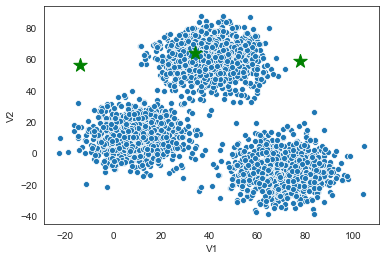

In [41]:
ax = sns.scatterplot(x="V1", y="V2", data=data)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='g')

In [42]:
# To store the value of centroids when it updates
centroids_prev = np.zeros(centroids.shape)
# Cluster Labels(0, 1, 2)
clusters = np.zeros(len(values))
# Error func. - Distance between new centroids and old centroids
# error = dist(centroids, centroids_prev, None)
error = np.linalg.norm(centroids - centroids_prev)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for iValue in range(len(values)):
        # distances = dist(values[iValue], centroids)
        distances = np.linalg.norm(values[iValue] - centroids, axis=1)
        cluster = np.argmin(distances)
        clusters[iValue] = cluster
    # Storing the old centroid values
    centroids_prev = cp.copy(centroids)
    # Finding the new centroids by taking the average value
    for iCluster in range(nb_clusters):
        points = [values[iValue]
            for iValue in range(len(values))
            if clusters[iValue] == iCluster
            ]
        centroids[iCluster] = np.mean(points, axis=0)
    # error = dist(centroids, centroids_prev, None)
    error = np.linalg.norm(centroids - centroids_prev)


[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


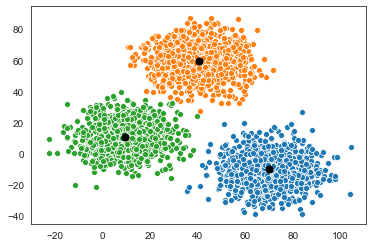

In [43]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
# fig, ax = plt.subplots()
for iCluster in range(nb_clusters):
        points = np.array([values[iValue]
            for iValue in range(len(values))
            if clusters[iValue] == iCluster])
        # ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[iCluster])
        ax = sns.scatterplot(points[:, 0], points[:, 1])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=200, c='#050505')
print(centroids)

<font size="5"><u>Description</u></font><br /><br />
Version avec sklearn<br />

[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


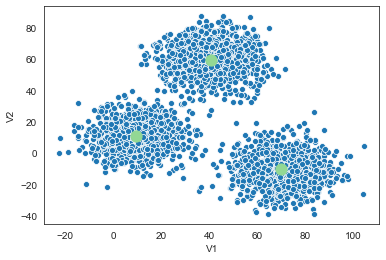

In [91]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#colors = sns.cubehelix_palette(6)
#sns.set_style('white')
#sns.despine(offset=10, trim=True)

data = pd.read_csv(path_to_file)
X = data.values

# plt.scatter(data["V1"], data["V2"], c='black', s=7)

ax = sns.scatterplot(x="V1", y="V2", data=data)

kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

ax.scatter(centroids[:, 0], centroids[:, 1], marker='.', c='#93d894', s=500)

print(kmeans.cluster_centers_)

In [103]:
kmeans.predict(np.array([[20, -20]]))

array([2], dtype=int32)